[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



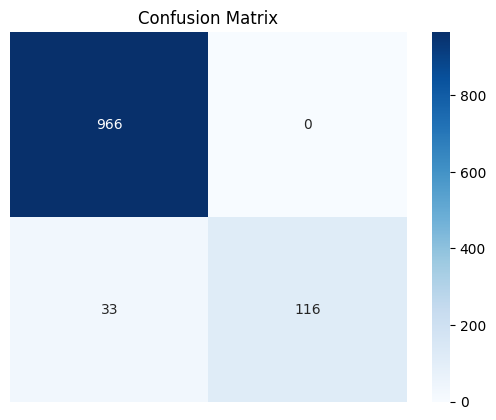

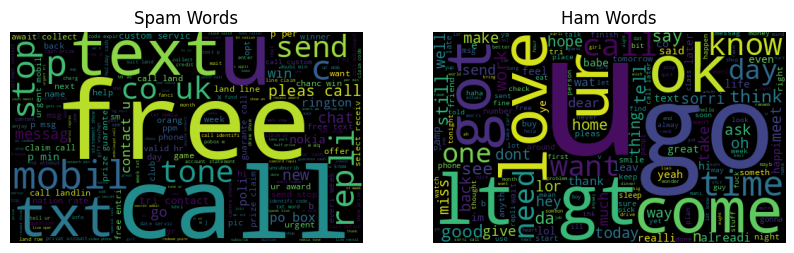

In [7]:
# ---------------------------------------
# 1. Import Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

# ---------------------------------------
# 2. Load Dataset
# ---------------------------------------
# Example dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv("spam.csv", encoding="latin-1", sep='\t', header=None)
df.columns = ['label','message']

# Convert labels
df['label'] = df['label'].map({'ham':0,'spam':1})

# ---------------------------------------
# 3. Text Cleaning Function
# ---------------------------------------
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove special characters/numbers
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['message'].apply(clean_text)

# ---------------------------------------
# 4. Feature Extraction (TF-IDF)
# ---------------------------------------
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label']

# ---------------------------------------
# 5. Train-Test Split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------
# 6. Logistic Regression Model
# ---------------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------------------
# 7. Evaluation
# ---------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.title("Confusion Matrix")
plt.axis("off") # Added to prevent axis labels overlapping with heatmap

plt.show()

# ---------------------------------------
# 8. Visualize Spam Patterns (Word Frequency)
# ---------------------------------------
spam_words = ' '.join(df[df['label']==1]['cleaned'])
ham_words = ' '.join(df[df['label']==0]['cleaned'])

from wordcloud import WordCloud
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300).generate(spam_words))
plt.title("Spam Words")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300).generate(ham_words))
plt.title("Ham Words")
plt.axis("off")

plt.show()

In [10]:
# Download the dataset
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)

# Save the zip file
with open("smsspamcollection.zip", "wb") as f:
    f.write(response.content)

# Extract the csv file
import zipfile

with zipfile.ZipFile("smsspamcollection.zip", "r") as zip_ref:
    zip_ref.extract("SMSSpamCollection", "temp_dir")

# Rename the extracted file to spam.csv
import os
os.rename("temp_dir/SMSSpamCollection", "spam.csv")

# Clean up the temporary directory and zip file
os.remove("smsspamcollection.zip")
os.rmdir("temp_dir")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed